# Data Preprocessing

In [1]:
# Import libraries required for data pre processing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the dataset from CSV to save as images
df = pd.read_csv('icml_face_data.csv')
print(df.head())

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [3]:
# Classes in the dataset
classes = 7
dic = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

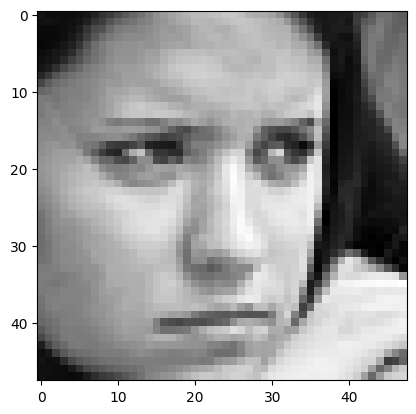

In [4]:
# Saving the dataset as images with file names as annotations
for index, emotion, usage, pixels in df.itertuples(name=None):
  a = np.reshape([int(x) for x in pixels.split(" ")], (48, 48))
  plt.imsave(f"Images/{usage}/{dic[emotion]}/{index}_{emotion}.bmp", a, cmap = "gray")
plt.imshow(a, cmap = "gray")

# VGG16 Architecture

In [5]:
train_dir = 'Images/Training'
validation_dir = 'Images/PublicTest'
test_dir = 'Images/PrivateTest'

In [14]:
from keras.preprocessing.image import ImageDataGenerator

image_gen_train = ImageDataGenerator(rescale = 1./255)
image_gen_test = ImageDataGenerator(rescale = 1./255)
image_gen_validation = ImageDataGenerator(rescale = 1./255)

IMG_SHAPE = 48

train_data_gen = image_gen_train.flow_from_directory(batch_size = 64,
directory = train_dir,
shuffle= True,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'categorical')

validation_data_gen = image_gen_validation.flow_from_directory(batch_size=64,
directory=validation_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='categorical')

test_data_gen = image_gen_test.flow_from_directory(batch_size=64,
directory=test_dir,
shuffle= False,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [13]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(weights="imagenet", include_top=False, input_shape = (48,48,3))
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [10]:
from keras import layers, models

base_model.trainable = False ## Not trainable weights

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(classes, activation='softmax')
    ])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 50)                25650     
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 7)                 147       
                                                                 
Total params: 14,741,505
Trainable params: 26,817
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [15]:
history = model.fit(train_data_gen, validation_data=validation_data_gen, epochs=15, validation_split=0.2, batch_size=32, verbose= 1)

Epoch 1/15
449/449 [==============================] - 137s 304ms/step - loss: 1.6742 - accuracy: 0.3357 - val_loss: 1.5807 - val_accuracy: 0.3901
Epoch 2/15
449/449 [==============================] - 72s 160ms/step - loss: 1.5652 - accuracy: 0.3891 - val_loss: 1.5387 - val_accuracy: 0.4026
Epoch 3/15
449/449 [==============================] - 71s 157ms/step - loss: 1.5300 - accuracy: 0.4083 - val_loss: 1.5263 - val_accuracy: 0.4110
Epoch 4/15
449/449 [==============================] - 71s 159ms/step - loss: 1.5054 - accuracy: 0.4190 - val_loss: 1.5199 - val_accuracy: 0.4099
Epoch 5/15
449/449 [==============================] - 146s 326ms/step - loss: 1.4848 - accuracy: 0.4278 - val_loss: 1.5082 - val_accuracy: 0.4221
Epoch 6/15
449/449 [==============================] - 70s 157ms/step - loss: 1.4690 - accuracy: 0.4376 - val_loss: 1.5133 - val_accuracy: 0.4110
Epoch 7/15
449/449 [==============================] - 71s 158ms/step - loss: 1.4504 - accuracy: 0.4463 - val_loss: 1.4866 - val_

{'loss': [1.6742078065872192, 1.5651934146881104, 1.5300251245498657, 1.5054181814193726, 1.4847850799560547, 1.4690173864364624, 1.4504355192184448, 1.4354310035705566, 1.4234634637832642, 1.4107000827789307, 1.4005146026611328, 1.38859224319458, 1.3780782222747803, 1.3666120767593384, 1.3566261529922485], 'accuracy': [0.33571353554725647, 0.3890765905380249, 0.40833884477615356, 0.41899752616882324, 0.4277752637863159, 0.43756312131881714, 0.44627121090888977, 0.4510432183742523, 0.45497927069664, 0.46326935291290283, 0.46577727794647217, 0.4726044237613678, 0.47943153977394104, 0.47908321022987366, 0.48263609409332275], 'val_loss': [1.5806808471679688, 1.5387282371520996, 1.5262995958328247, 1.5199196338653564, 1.5081806182861328, 1.5133405923843384, 1.4866143465042114, 1.4989972114562988, 1.5037530660629272, 1.4828060865402222, 1.4973238706588745, 1.4902710914611816, 1.4961916208267212, 1.514797329902649, 1.5083047151565552], 'val_accuracy': [0.3900808095932007, 0.4026191234588623,

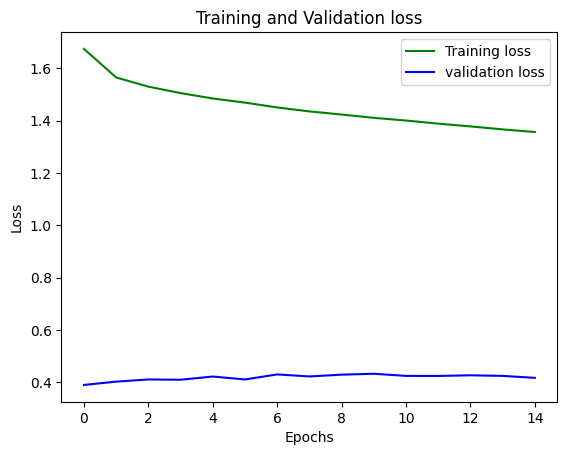

In [16]:
loss_train = history.history['loss']
loss_val = history.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

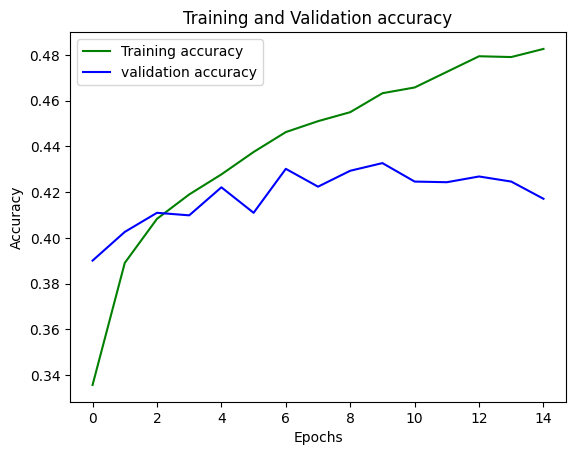

In [17]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,15)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
stl = ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

plt.style.use(stl[5])

y_pred = np.argmax(predict, axis=1)
print(y_pred)
print(test_data_gen.classes)
# print(test_data_gen.filenames)
cnf_matrix = confusion_matrix(test_data_gen.classes, y_pred)
cmd = ConfusionMatrixDisplay(cnf_matrix, display_labels=['b','d', 'j', 'o', 'w'])
cmd.plot()
# plt.imshow(cnf_matrix, cmap='binary')
#
# plt.show()

NameError: name 'predict' is not defined